In [14]:
# import the necessary packages
%matplotlib inline 
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from matplotlib import pyplot as plt

In [15]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [16]:
imagePath = "image/my_o.jpg"
image = cv2.imread(imagePath)
#image = imutils.resize(image, width=1000)
image = cv2.resize(image,(1000,1000))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = image.shape[:2]

rectangles[[(233, 295) (788, 850)]]


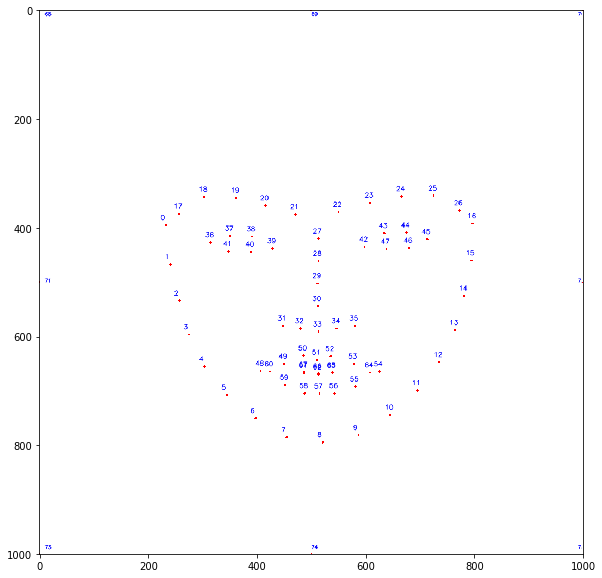

In [17]:
# detect faces in the grayscale image
rects = detector(gray, 1)
print(rects)

# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        imgmax = np.zeros([1000,1000,3],dtype=np.uint8)
        imgmax.fill(255)
        
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        #(x, y, w, h) = face_utils.rect_to_bb(rect)
        #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # show the face number
        #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
            #cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        count=0
        font = cv2.FONT_HERSHEY_SIMPLEX
        for (x, y) in shape:
            cv2.circle(imgmax, (x, y), 2, (0, 0, 255), -1)
            cv2.putText(imgmax,'%d' % count,(x-10,y-10), font, 0.4,(255,0,0),1,cv2.LINE_AA)
            count=count+1
            
        cv2.circle(imgmax, (0, 0), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(0+10, 0+10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (int(width/2), 0), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(int(width/2), 0+10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (width, 0), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(width-10, 0+10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (0, int(height/2)), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(0+10, int(height/2)), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (width, int(height/2)), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(width-10, int(height/2)), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (0, height), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(0+10, height-10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (int(width/2), height), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(int(width/2), height-10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
        count=count+1
        cv2.circle(imgmax, (width, height), 1, (0, 0, 255), -1)
        cv2.putText(imgmax,'%d' % count,(width-10, height-10), font, 0.3,(255,0,0),1,cv2.LINE_AA)
 
# show the output image with the face detections + facial landmarks
np.save("detectedmark.npy", shape)
cv2.imwrite("output/my_r_w.jpg",imgmax)
plt.figure(figsize=(10,10))
plt.imshow(imgmax[:,:,(2,1,0)]/255)
#plt.imshow(image, 'gray'),plt.show()

Read in the points from a text file
insert point
Draw delaunay triangles
Draw points
Allocate space for Voronoi Diagram
Draw Voronoi diagram
Show results
[(36, 0, 17), (0, 36, 1), (71, 68, 0), (71, 0, 1), (59, 49, 61), (49, 59, 60), (71, 1, 2), (55, 10, 9), (10, 55, 54), (71, 2, 3), (2, 1, 36), (34, 52, 33), (52, 34, 53), (71, 4, 73), (4, 71, 3), (3, 2, 41), (31, 29, 30), (29, 31, 39), (73, 4, 5), (4, 3, 48), (40, 38, 39), (38, 40, 37), (73, 6, 74), (6, 73, 5), (5, 4, 48), (38, 20, 39), (20, 38, 19), (74, 6, 7), (6, 5, 48), (37, 40, 41), (74, 7, 8), (7, 6, 59), (21, 39, 20), (39, 21, 27), (8, 7, 58), (11, 75, 10), (75, 11, 12), (9, 75, 74), (75, 9, 10), (8, 9, 74), (9, 8, 56), (3, 41, 31), (11, 10, 54), (31, 41, 40), (75, 12, 72), (12, 11, 54), (18, 37, 36), (37, 18, 19), (72, 12, 13), (13, 12, 35), (36, 17, 18), (72, 15, 16), (15, 72, 14), (13, 14, 72), (14, 13, 46), (70, 72, 16), (15, 14, 45), (35, 29, 42), (29, 35, 30), (16, 15, 45), (25, 44, 24), (44, 25, 45), (0, 68, 17), (42, 28,

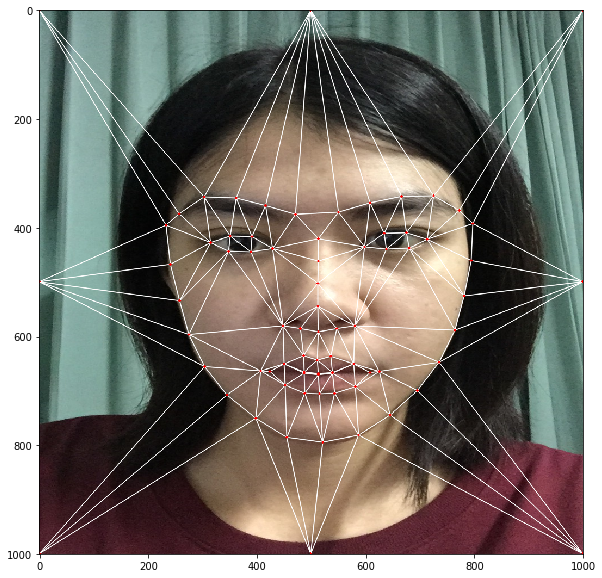

In [18]:
#!/usr/bin/python
 
import cv2
import numpy as np
import random
 
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
 
# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )
 
 
# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :
 
    triangleList = subdiv.getTriangleList();
    r = (0, 0, size[1], size[0])
    delaunayTri = []
    for t in triangleList :
        pt = []
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
         
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)
            ind = []
            for j in range(0, 3):
                for k in range(0, len(points)):
                    if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)
            if len(ind) == 3:
                delaunayTri.append((ind[0], ind[1], ind[2]))
    
    return delaunayTri
 
 
# Draw voronoi diagram
def draw_voronoi(img, subdiv) :
 
    ( facets, centers) = subdiv.getVoronoiFacetList([])
 
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
         
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
 
        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)
 
 
if __name__ == '__main__':
 
    # Define window names
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"
 
    # Turn on animation while drawing triangles
    animate = True
     
    # Define colors for drawing.
    delaunay_color = (255,255,255)
    points_color = (0, 0, 255)
 
    # Read in the image.
    img = cv2.imread(imagePath);
    img = cv2.resize(img,(1000,1000))
    # Keep a copy around
    img_orig = img.copy();
     
    # Rectangle to be used with Subdiv2D
    size = img.shape
    rect = (0, 0, size[1], size[0])
     
    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect);
 
    # Create an array of points.
    points = [];
     
    # Read in the points from a text file
    #with open("points.txt") as file :
        #for line in file :
            #x, y = line.split()
            #points.append((int(x), int(y)))
    print('Read in the points from a text file')
    for (x, y) in shape:
        points.append((int(x),int(y)))
            
    points.append((0, 0))
    points.append((int(width/2-1), 0))
    points.append((width-1, 0))
    points.append((0, int(height/2-1)))
    points.append((width-1, int(height/2-1)))
    points.append((0, height-1))
    points.append((int(width/2-1),height-1))
    points.append((width-1, height-1))
        
    
            
 
    # Insert points into subdiv
    print('insert point')
    for p in points :
        subdiv.insert(p)
         
        # Show animation
        if animate :
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay( img_copy, subdiv, (255, 255, 255) );
            cv2.imwrite(win_delaunay+'.jpg',img_copy)
            #cv2.imshow(win_delaunay, img_copy)
            #cv2.waitKey(100)
 
    # Draw delaunay triangles
    print('Draw delaunay triangles')
    dd = draw_delaunay( img, subdiv, (255, 255, 255) );
 
    # Draw points
    print('Draw points')
    for p in points :
        draw_point(img, p, (0,0,255))
 
    # Allocate space for Voronoi Diagram
    print('Allocate space for Voronoi Diagram')
    img_voronoi = np.zeros(img.shape, dtype = img.dtype)
 
    # Draw Voronoi diagram
    print('Draw Voronoi diagram')
    draw_voronoi(img_voronoi,subdiv)
 
    # Show results
    print('Show results')
    #cv2.imshow(win_delaunay,img)
    #cv2.imshow(win_voronoi,img_voronoi)
    cv2.imwrite("output/my_o_tri.jpg",img)
    plt.figure(figsize=(10,10))
    plt.imshow(img[:,:,(2,1,0)]/255)
    #plt.imshow(img),plt.show()
    #plt.imshow(img_voronoi),plt.show()
    #print(dd)
    print(dd)

In [ ]:
หาหน้าผาก